# Assignment 2: K-Nearest Neighbor and Classification
List your team members (name and immatriculation number) in the following cell:

- Likhit Jain, 3678905, M.Sc. Computer Science
- Tareq Abu El Komboz, 3405686, M.Sc. Informatik 
- Serge Kotchourko, 3309449, M.Sc. Informatik

- In this assignment, you will implment a K-Nearest Neighbors (KNN) classifier using the famous Iris dataset. 
- The Iris dataset is a classic machine learning benchmark consisting of 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The full description of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/iris
- The goal of this assignment is to train a KNN classifier on the Iris dataset to predict the species of iris flower based on its four features.
- Only use the already imported libraries. 


**In this assignment, you will implement the KNN algorithm using Python and the scikit-learn library.**

In [544]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline

# You will start by loading and exploring the Iris dataset

**Load the Iris dataset**

In [545]:
# Load the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
# define X and Y, such that X --> features and Y --> labels
X, Y = iris.data, iris.target

**Print Feature Names**

In [546]:
# print dataset column names
print("Iris dataset column names: ", ', '.join(iris.feature_names)) # ??? There are no real column names, just feature names

Iris dataset column names:  sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


In [547]:
# print feature names (variable names)
print("Iris dataset feature names: ", ', '.join(iris.feature_names))

Iris dataset feature names:  sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


**Print Labels**

In [548]:
# print unique labels
print("Iris dataset labels: ", np.unique(Y))
print("Iris dataset labels: ", ', '.join(iris.target_names))

Iris dataset labels:  [0 1 2]
Iris dataset labels:  setosa, versicolor, virginica


**Create a pandas dataframe using the given data and target, and subsequently name the columns of the dataframe with the target names.**

In [549]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Now add the iris type from the irs_data['target']**

In [550]:
df['iris type'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Now augment your dataset with a column "Iris name", this column should contain the Iris name ('sentosa', 'versicolor', 'virginica') based on the Iris type**

| Iris Type | Iris Name |
| --- | --- | 
| 0 | sentosa |
| 1 | versicolor |
| 2 | virginica |

In [551]:
df['iris name'] = df['iris type'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type,iris name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Now print some basic statistical details like percentile, mean, std, etc. of the dataset.**

In [552]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Now group data instances by their type to  better refine information**

In [553]:
df.groupby('iris name').describe().transpose() # Using name instead of type to get the actual name, not just the number

iris name                   setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000
iris type         count  50.000000   50.000000  50.000000
                  mean    0.000000    1.000000   2.000000
                  std     0.000000    0.000000   0.000000
                  min     0.000000    1.000000   2.000000
                  25%     0.000000    1.000000   2.000000
                  50%     0.000000    1.000000   2.000000
                  75%     0.000000    1.000000   2.000000
                  max     0.000000    1.000000   2.000000

What can you deduce from the above output?

Solution:
The dataset contains 150 instances equally distributed among the three classes "setosa", "versicolor" and "virginica". We observe the following for the four features:
- The sepal length is the smallest for "setosa" and the largest for "virginica" and the standard deviation is the largest for "virginica", while for "setosa" it is the smallest.
- We can observe the same for petal length and petal width, but the difference between the classes is even more pronounced, especially between "setosa" and the other two classes.
- The standard deviation of the class "setosa" is the smallest for all features, exclusing sepal width.
- Considering the above observations, the sepal width shows the inverse behaviour.

# Data visualization:
**Create four violin plots that represent the data features for each iris type, with the iris name as the x-axis and the data feature as the y-axis**

In [554]:
# First, some colors 
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("Set2")

<Axes: xlabel='iris name', ylabel='sepal length (cm)'>

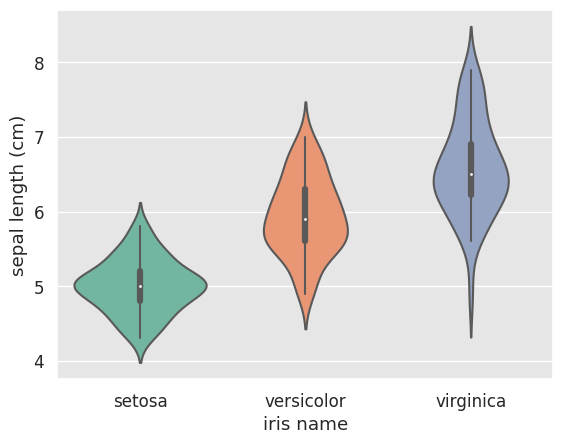

In [555]:
sns.violinplot(data=df, x='iris name', y='sepal length (cm)')

<Axes: xlabel='iris name', ylabel='sepal width (cm)'>

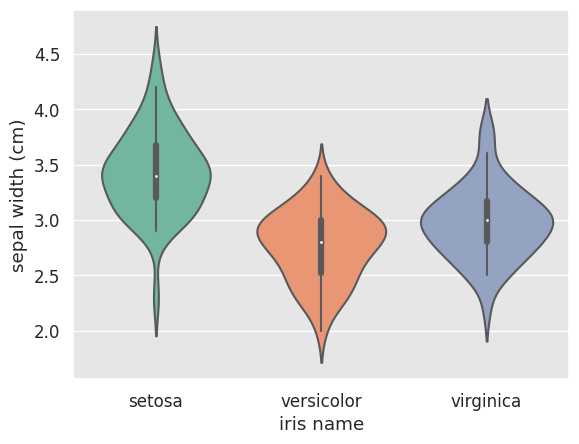

In [556]:
sns.violinplot(data=df, x='iris name', y='sepal width (cm)')

<Axes: xlabel='iris name', ylabel='petal length (cm)'>

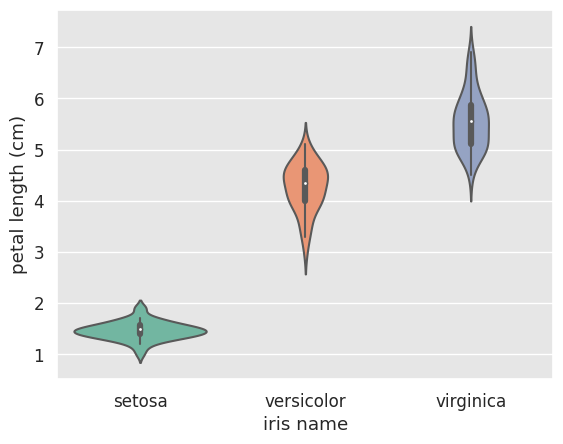

In [557]:
sns.violinplot(data=df, x='iris name', y='petal length (cm)')

<Axes: xlabel='iris name', ylabel='petal width (cm)'>

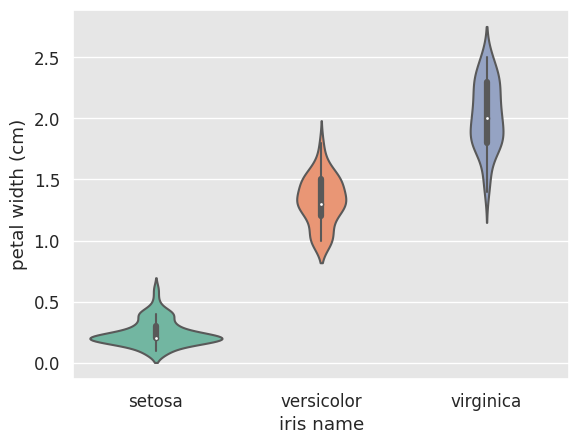

In [558]:
sns.violinplot(data=df, x='iris name', y='petal width (cm)')	

**Using the seaborn library, create a pairplot of the iris dataset, with the following specifications:**

**- Use the 'Iris name' column to distinguish between the different types of iris.**

**- Display the scatterplots for the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)' columns only (set the 'vars' parameter accordingly).**



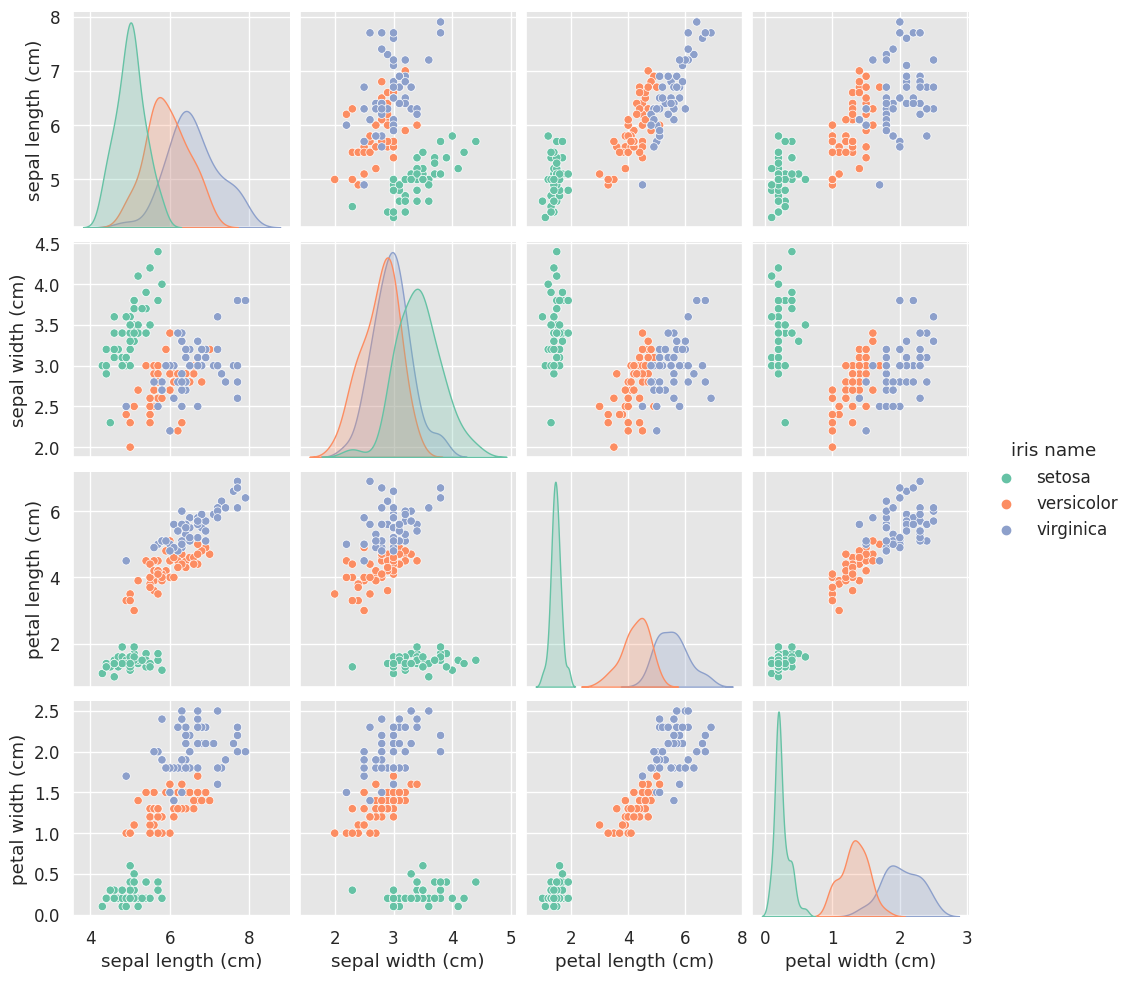

In [559]:
sns.pairplot(df, hue='iris name', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

**Produce a heatmap above to find out the correlations between the measurements**

<Axes: >

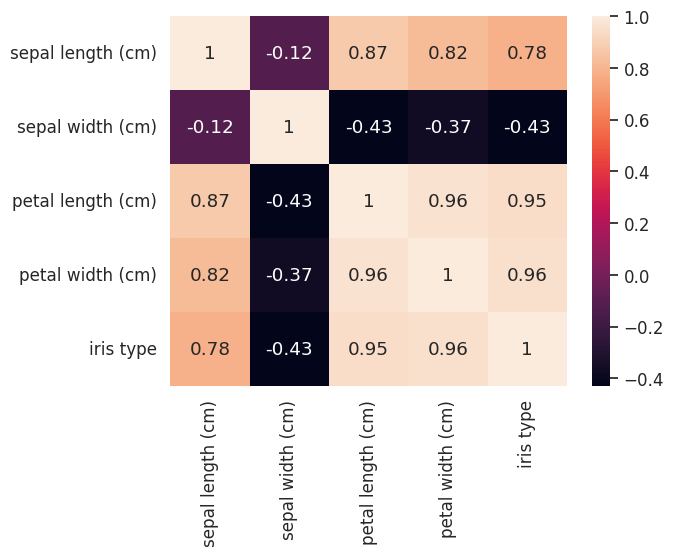

In [560]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# K-Nearest Neighbor for Iris dataset classification
The KNN algorithm is a simple and effective classification technique that belongs to the family of lazy learning methods. It works by computing the distances between the input data point and all the training data points in the feature space. Then, the algorithm selects the K-nearest neighbors of the input point based on their distances, and assigns the majority class of these neighbors as the predicted class of the input point. The value of K is a hyperparameter that can be tuned to achieve better accuracy on the test set.

**Now split the dataset to X (data features) and Y (labels)** 

In [561]:
X = df.drop(['iris type', 'iris name'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Now split it into training and test sets, the test set should be 20% of the original dataset.**

In [562]:
Y = df['iris type']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: iris type, dtype: int64

In [563]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("X_train, X_test shape: ", X_train.shape, X_test.shape)
print("Y_train, Y_test shape: ", Y_train.shape, Y_test.shape)


X_train, X_test shape:  (120, 4) (30, 4)
Y_train, Y_test shape:  (120,) (30,)


**Normalize the dataset**

In [564]:
X_train_norm, X_test_norm = Normalizer().fit_transform(X_train), Normalizer().fit_transform(X_test)
X_train_norm[:5], X_test_norm[:5]


(array([[0.71562645, 0.3523084 , 0.56149152, 0.22019275],
        [0.776114  , 0.54974742, 0.30721179, 0.03233808],
        [0.76262994, 0.34186859, 0.52595168, 0.1577855 ],
        [0.78889479, 0.55222635, 0.25244633, 0.09466737],
        [0.73446047, 0.37367287, 0.5411814 , 0.16750853]]),
 array([[0.74088576, 0.33173989, 0.55289982, 0.18798594],
        [0.71171214, 0.35002236, 0.57170319, 0.21001342],
        [0.81803119, 0.51752994, 0.25041771, 0.01669451],
        [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
        [0.77242925, 0.33706004, 0.51963422, 0.14044168]]))

# Step 1 (Euclidean Distance):
- To compute the distances between the input data point and all the training data points in the feature space, we need to implement the distance function
- Implement a function to calculate the Euclidean distance between two data points 

In [565]:
def distance_ecu(x_train, x_test_point):
    """
    Input:
      - x_train: corresponding to the training data
      - x_test_point: corresponding to the test point

    Output:
      -distances: The distances between the test point and each point in the training data.

    """
    # Assumption, x_train is a numpy array, x_test_point is a list representing a single point
    # distances = [np.sqrt(np.sum((x_train_point - x_test_point)**2)) for x_train_point in x_train]
    
    # This is the same as the list comprehension above, but using numpys black magic
    distances = np.sqrt(np.sum((x_train - x_test_point)**2, axis=1))

    return distances

# # Test the function
# print(distance_ecu(X_train_norm, X_test_norm[0])[:5])
# print([np.sqrt(np.sum((x_train_point - X_test_norm[0])**2)) for x_train_point in X_train_norm])
# distancess = []
# for i in range(4):
#     distancess.append((X_train_norm[3][i] - X_test_norm[0][i])**2)
# print(np.sqrt(np.sum(distancess)))


# Step 2 (Find the nearest neighbors):
- Implement a function to compute the K nearest neighbors to a single data point

In [566]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """
    # assume that distance_point is a numpy array containing the distances between the test point and each point in the training data
    # and that K is an integer
    df_nearest = np.argpartition(distance_point, K)[:K]
    return df_nearest

# # Test the functions
# indexes = nearest_neighbors(distance_ecu(X_train_norm, X_test_norm[0]), 5)
# print("Test point: ", X_test_norm[0])
# print("Indexes of nearest neighbors: ", indexes)
# print("Values of nearest neighbors: ", X_train_norm[indexes])
# print("Labels of nearest neighbors: ", Y_train.iloc[indexes])


# Step 3 (Classify the point based on a majority vote):
- Implement a function to assign the label to a data point based on the majority vote of the K nearest neighbors

In [567]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """
    # assume that df_nearest is a numpy array containing the indexes of the nearest neighbors
    y_pred = Counter(y_train.iloc[df_nearest]).most_common(1)[0][0]
    return y_pred

# # Test the function
# print("Test point: ", X_test_norm[0])
# print("Indexes of nearest neighbors: ", indexes)
# print("Values of nearest neighbors: ", X_train_norm[indexes])
# print("Labels of nearest neighbors: ", Y_train.iloc[indexes])
# print("Prediction: ", voting(indexes, Y_train))

# Step 4 Full Algorithm:
- Implement a function to combine the helper functions you implemented previously

In [568]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """
    # your solution should go here
    y_pred = [voting(nearest_neighbors(distance_ecu(x_train, x_test_point), K), y_train) for x_test_point in x_test]
    return y_pred  

# # Test the function
# y_pred = KNN_from_scratch(X_train_norm, Y_train, X_test_norm, 5)
# print("Prediction: ", y_pred[:10])
# print("Actual: ", Y_test.iloc[:10].values)


**Test the KNN Algorithm on the test dataset using K = 3**

In [569]:
Y_pred = KNN_from_scratch(X_train_norm, Y_train, X_test_norm, 3)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df.head()

,Actual,Predicted
77,1,1
127,2,2
9,0,0
8,0,0
81,1,1


**Evaluate the performance of your implemented classifier by computing the accuracy**

In [570]:
# your solution should go here
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.9666666666666667


**Implement a functoin to perform Hyper-parameter Tuning using K-fold Cross Validation**

In [571]:
# you can choose any suitable range for k (example: list(range(1,30,2) )
def hyper_parameter_tuning(X, Y, k_range, split=5):
    """
    Input:
    -X: the full dataset
    -Y: the labels of the dataset
    -k_range: a list of values for K

    Output:
    -avg_scores: the average accuracy for each value of K

    """
    # your solution should go here
    avg_scores = []
    for k in k_range:
        # split the data with KFold, 5 splits like in lecture
        kf = KFold(n_splits=split)
        scores = []
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            # split the data
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
            # normalize the data
            X_train_norm, X_test_norm = Normalizer().fit_transform(X_train), Normalizer().fit_transform(X_test)
            # predict the data
            Y_pred = KNN_from_scratch(X_train_norm, Y_train, X_test_norm, k)
            # calculate the accuracy
            scores.append(accuracy_score(Y_test, Y_pred))
        # calculate the average accuracy
        avg_scores.append(np.mean(scores))
    return avg_scores


**To evaluate the performance of your implemented classifier with different values of K:**

**- Compute the accuracy of the classifier for each K**

**- Compute the best accuracy**


In [572]:
k_range = list(range(1,30,1))
avg_scores = hyper_parameter_tuning(X, Y, k_range, split=5)
avg_scores

[0.9333333333333332,
 0.9333333333333332,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001,
 0.9400000000000001,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001,
 0.9466666666666667,
 0.9333333333333333,
 0.9266666666666667,
 0.9133333333333333,
 0.9133333333333333,
 0.9133333333333333,
 0.9133333333333333,
 0.9133333333333333,
 0.9133333333333333,
 0.9066666666666666,
 0.9133333333333333,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.9]

In [573]:
# your solution should go here
arg_max = (np.argmax(avg_scores) + 1)
print("Best K: ", arg_max)

Best K:  10


# Step 5 Visualize the performance of you classifier:
- Create a line graph to visualize the performance of your KNN classifier with different values of K, using the accuracy list as the y-values and the range of K value as the x-values.

- Your graph should have a title and labels for the x-axis and y-axis.

[Text(0.5, 1.0, 'Average Accuracy of kNN vs Hyperparameter k'),
 Text(0.5, 0, 'k'),
 Text(0, 0.5, 'Average Accuracy')]

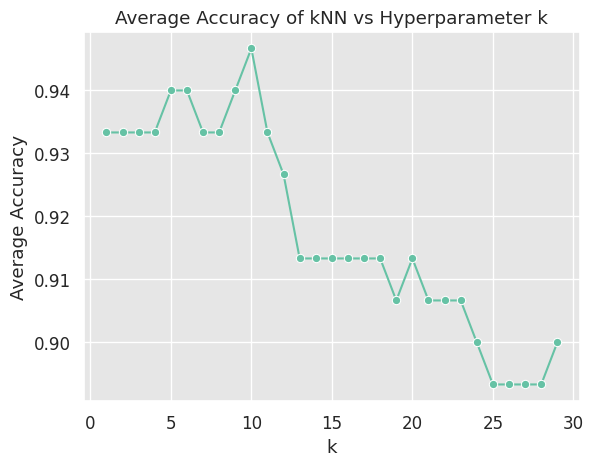

In [574]:
# your solution should go here
sns.lineplot(x=k_range, y=avg_scores, marker='o').set(title='Average Accuracy of kNN vs Hyperparameter k', xlabel='k', ylabel='Average Accuracy')